# Paquetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
data = pd.read_csv("data/Bank Marketing.csv", sep=';')
data.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [3]:
# Dimensión del dataset de trabajo.
data.shape

(45211, 17)

In [4]:
# Vemos los diferentes tipos de variables del dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

In [5]:
# Vemos la distribución de las variables numércias.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
Balance (euros),45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
Last Contact Day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
Last Contact Duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
Campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
Pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
Previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
Subscription,45211.0,1.116985,0.321406,1.0,1.0,1.0,1.0,2.0


In [6]:
# Corregimos las clases de la variable respuesta.
data["Subscription"] = data['Subscription'].map({2:1, 1:0})

Vemos que tenemos una variable a predecir con clases bastante desbalanceadas.

In [7]:
# Vemos la distribución de las clases de la variable respuesta.
data["Subscription"].value_counts()

0    39922
1     5289
Name: Subscription, dtype: int64

# Preguntas (punto 1)

In [8]:
# Cantidad de filas y columnas.
data.shape

(45211, 17)

In [9]:
# Variables numéricas y categóricas. Valores vacíos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

In [10]:
# No hay NAs pero hay info faltante -> unknown en categóricas.
data["Contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: Contact, dtype: int64

Podemos ver que algunas variables categóricas tienen la categoría *unknown* indicando que no tenemos disponible esa información.
* En las variables **Job** y **Education** las frecuencias no parecen tener tanta incidencia.
* En la variable **Contact** tenemos un tercio de las observaciones con información faltante.
* La variable **Poutcome** (el resultado de la campaña anterior) tiene un 80% de observaciones faltantes. Esto se da porque la mayoría de los clientes analizados no participaron de campañas anteriores. 

Esta última variable contiene información relevante y debemos pensar cómo incluirla en el modelo.

In [11]:
(data == "unknown").sum()

Age                          0
Job                        288
Marital Status               0
Education                 1857
Credit                       0
Balance (euros)              0
Housing Loan                 0
Personal Loan                0
Contact                  13020
Last Contact Day             0
Last Contact Month           0
Last Contact Duration        0
Campaign                     0
Pdays                        0
Previous                     0
Poutcome                 36959
Subscription                 0
dtype: int64

La variable **Pdays** tiene una gran cantidad de valores faltantes porque se corresponde con las observaciones que no participaron de campañas anteriores.

In [12]:
(data == -1).sum()

Age                          0
Job                          0
Marital Status               0
Education                    0
Credit                       0
Balance (euros)             50
Housing Loan                 0
Personal Loan                0
Contact                      0
Last Contact Day             0
Last Contact Month           0
Last Contact Duration        0
Campaign                     0
Pdays                    36954
Previous                     0
Poutcome                     0
Subscription                 0
dtype: int64

In [13]:
# Estado civil.
data["Marital Status"].value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: Marital Status, dtype: float64

In [14]:
# Educación.
data["Education"].value_counts(normalize=True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: Education, dtype: float64

In [15]:
# Suscripcion al plazo fijo.
data["Subscription"].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: Subscription, dtype: float64

# Funciones para plotear

In [16]:
def plotCont(variable, log = False, n_bins = 50):
  if log == False:
    print((data[variable]).describe())
  else:
    print(np.log(data[variable]).describe())

  plt.figure(figsize = (10, 5))
  sns.histplot(data=data, x=variable, log_scale=log, bins = n_bins)
  plt.title(variable)
  plt.show()

  if log == True:
    plt.figure(figsize = (10, 5))
    sns.boxplot(data=data, x = "Subscription", y = np.log10(data[variable]))
    plt.title(variable)
    plt.show()
  else:
    plt.figure(figsize = (10, 5))
    sns.boxplot(data=data, x = "Subscription", y = variable)
    plt.title(variable)
    plt.show()

def plotCat(variable, prop = True):
  table1 = data[variable].value_counts(normalize = prop)
  print(table1)

  display(pd.crosstab(index = data["Subscription"], 
                        columns = data[variable]))


  if prop:
    display(pd.crosstab(index = data["Subscription"], 
                        columns = data[variable], 
                        normalize = 'columns')) 
    

  plt.figure(figsize = (10, 5))
  sns.barplot(x=table1.index, y = table1.values)
  plt.xticks(rotation = 45)
  plt.show()
  
  

# Analisis y visualizacion de variables

Realizamos el análisis exploratorio de las variables del dataset.

## Age

Edad de la persona.

* A partir de 60 años hay un cambio en la distribución.
* No parece haber grandes diferencias con la variable respuesta.
* Vemos que hay una diferencia en la proporción de la variable respuesta cuando la edad es >60 años.




count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: Age, dtype: float64


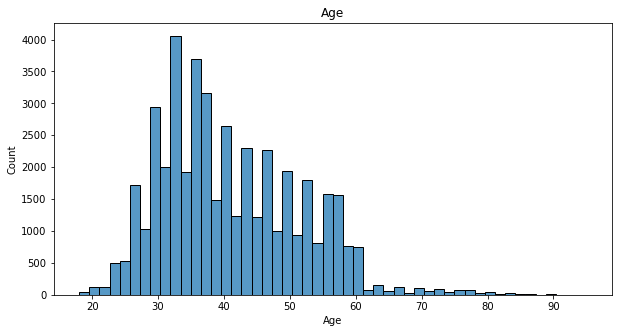

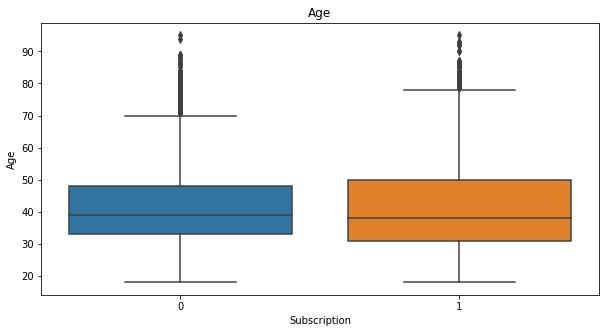

In [17]:
plotCont('Age', log=False) 

Podemos ver la diferencia de proporciones entre los jubilados que invierten en el plazo fijo después de la campaña contra los no jubilados.

In [18]:
jubilados = pd.cut(data["Age"], [0,60,100], labels=['Mayor60', 'Menor60'])
pd.crosstab(index=data["Subscription"], columns=jubilados, normalize='columns')

Age,Mayor60,Menor60
Subscription,,
0,0.891261,0.577441
1,0.108739,0.422559


Los resultados de las proporciones anteriores se da por el corte abrupto que tiene la variable Edad.

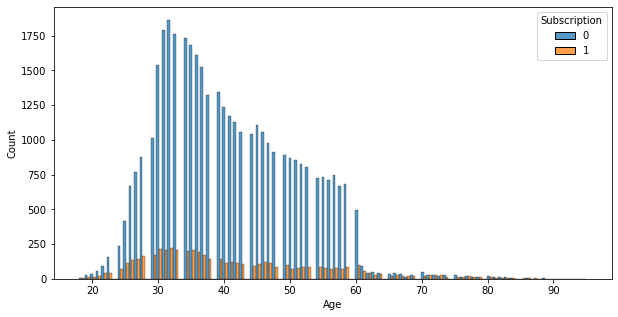

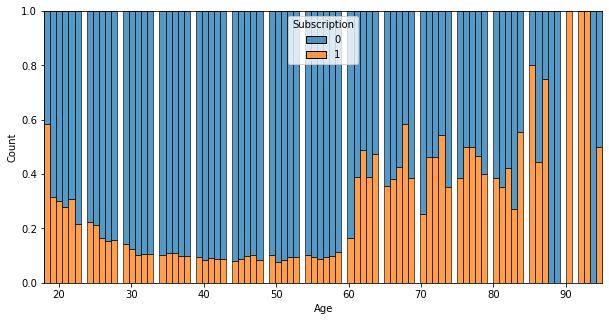

In [19]:
plt.figure(figsize = (10, 5))
sns.histplot(data=data,
             x = "Age",
             hue = "Subscription",
             multiple = "dodge")
plt.show()

plt.figure(figsize = (10, 5))
sns.histplot(data=data,
             x = "Age",
             hue = "Subscription",
             multiple = "fill")
plt.show()

## Job

Empleo de la persona.

* Agrupamos las categorías con frecuencia menor a 5 % en *otros*.


In [20]:
data["Job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: Job, dtype: int64

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: Job, dtype: float64


Job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Subscription,,,,,,,,,,,,
0,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254
1,631,708,123,109,1301,516,187,369,269,840,202,34


Job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Subscription,,,,,,,,,,,,
0,0.877973,0.92725,0.917283,0.912097,0.862444,0.772085,0.881571,0.91117,0.71322,0.88943,0.844973,0.881944
1,0.122027,0.07275,0.082717,0.087903,0.137556,0.227915,0.118429,0.08883,0.28678,0.11057,0.155027,0.118056


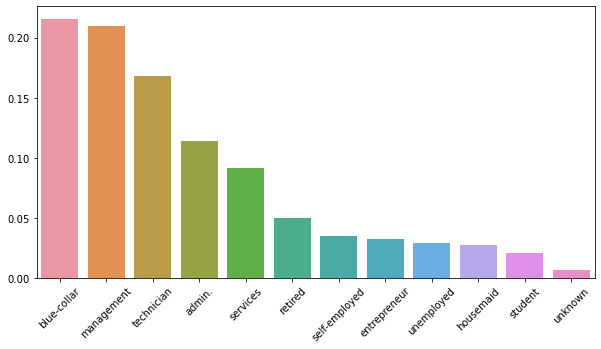

In [21]:
plotCat('Job', prop=True)

In [22]:
pd.crosstab(index=data["Age"]<=20, columns=data["Job"])

Job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Age,,,,,,,,,,,,
False,5169,9728,1487,1240,9458,2264,1579,4153,848,7597,1303,288
True,2,4,0,0,0,0,0,1,90,0,0,0


In [23]:
pd.crosstab(columns=data["Job"], index=jubilados)

Job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Age,,,,,,,,,,,,
Mayor60,5146,9706,1474,1184,9353,1389,1555,4152,938,7567,1293,266
Menor60,25,26,13,56,105,875,24,2,0,30,10,22


Podemos agrupar todos los trabajos que tengan una frecuencia menor al 5% en una categoría otros.

In [24]:
trabajo_frec = data["Job"].value_counts(normalize=True)
trabajos_otros = list(trabajo_frec.index[(trabajo_frec<0.05).values])
print(trabajos_otros)

['self-employed', 'entrepreneur', 'unemployed', 'housemaid', 'student', 'unknown']


In [25]:
data["Job"].mask(data["Job"].isin(trabajos_otros), "others")

0         management
1         technician
2             others
3        blue-collar
4             others
            ...     
45206     technician
45207        retired
45208        retired
45209    blue-collar
45210         others
Name: Job, Length: 45211, dtype: object

## Marital Status

Estados Civil.

* No parece haber grandes diferencias entre las distintas clases.
* Las personas solteras son más propensas a acceder a un plazo fijo

married     0.601933
single      0.282896
divorced    0.115171
Name: Marital Status, dtype: float64


Marital Status,divorced,married,single
Subscription,,,
0,4585,24459,10878
1,622,2755,1912


Marital Status,divorced,married,single
Subscription,,,
0,0.880545,0.898765,0.850508
1,0.119455,0.101235,0.149492


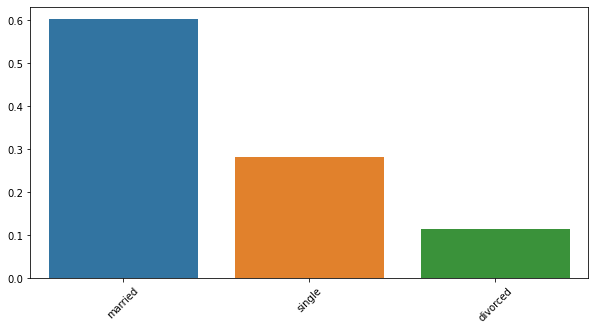

In [26]:
plotCat('Marital Status')

## Education

Educación de la persona.

* Tenemos algunas observaciones de las que no tenemos información pero resultan menos del 5% del set. Podemos pensar en imputar la clase más frecuente.

* Vemos una tendencia a mayor nivel educativo, mayor aceptación del plazo fijo.

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: Education, dtype: float64


Education,primary,secondary,tertiary,unknown
Subscription,,,,
0,6260,20752,11305,1605
1,591,2450,1996,252


Education,primary,secondary,tertiary,unknown
Subscription,,,,
0,0.913735,0.894406,0.849936,0.864297
1,0.086265,0.105594,0.150064,0.135703


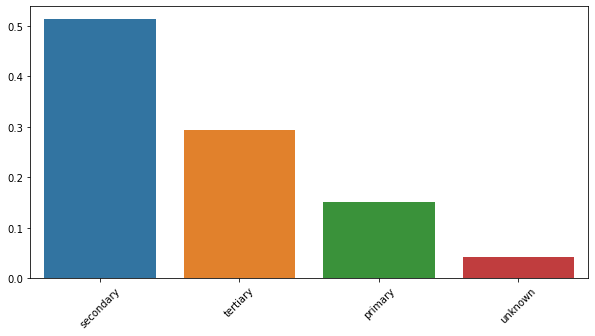

In [27]:
plotCat('Education')

## Credit

Variable binaria si tiene crédito en default o sin pagar.

* Tiene categoría con muy baja frecuencia.
* Seguramente lo mejor será excluirla del análisis.

no     0.981973
yes    0.018027
Name: Credit, dtype: float64


Credit,no,yes
Subscription,,
0,39159,763
1,5237,52


Credit,no,yes
Subscription,,
0,0.882039,0.936196
1,0.117961,0.063804


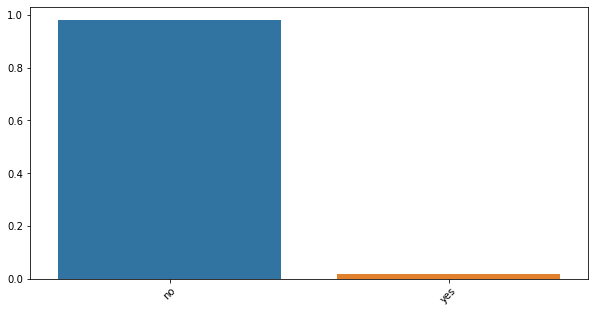

In [28]:
plotCat('Credit')

## Balance (euros)

* Es una variable con distribución asimétrica y con valores negativos.



count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: Balance (euros), dtype: float64


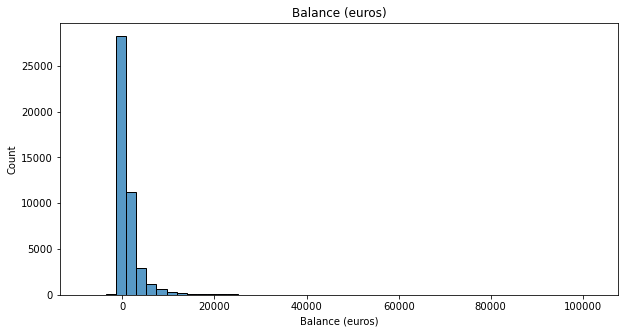

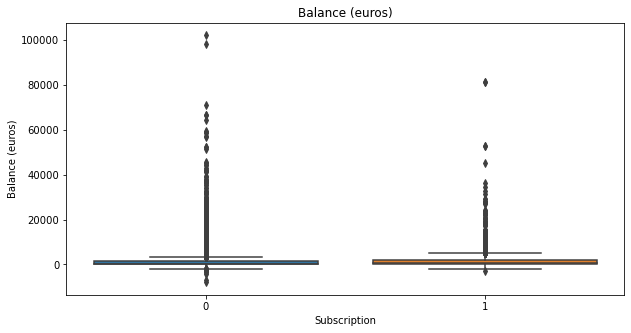

In [29]:
plotCont('Balance (euros)')

Podemos pensar en partir la distribución en cuantiles de 10% y ver cómo se vincula con la variable respuesta.

In [30]:
balance_quantile = data["Balance (euros)"].quantile(np.arange(0,1.1,0.1))
print(balance_quantile)

labels_quantile = []
for quantile in np.arange(0.1,1.1,0.1):
  quantile = round(quantile, 2)
  labels_quantile.append(f"qt {quantile}")

print(labels_quantile)

0.0     -8019.0
0.1         0.0
0.2        22.0
0.3       131.0
0.4       272.0
0.5       448.0
0.6       701.0
0.7      1126.0
0.8      1859.0
0.9      3574.0
1.0    102127.0
Name: Balance (euros), dtype: float64
['qt 0.1', 'qt 0.2', 'qt 0.3', 'qt 0.4', 'qt 0.5', 'qt 0.6', 'qt 0.7', 'qt 0.8', 'qt 0.9', 'qt 1.0']


In [31]:
data["Balance_qt"] = pd.cut(data["Balance (euros)"], 
                            bins=balance_quantile,
                            labels=labels_quantile)
data["Balance_qt"]

0        qt 0.9
1        qt 0.3
2        qt 0.2
3        qt 0.8
4        qt 0.2
          ...  
45206    qt 0.7
45207    qt 0.8
45208    qt 1.0
45209    qt 0.6
45210    qt 0.9
Name: Balance_qt, Length: 45211, dtype: category
Categories (10, object): ['qt 0.1' < 'qt 0.2' < 'qt 0.3' < 'qt 0.4' ... 'qt 0.7' < 'qt 0.8' < 'qt 0.9' < 'qt 1.0']

Podemos ver cómo a medida que subimos en el cuantil del balance tenemos un aumento en la proporción de éxito en la campaña. Las personas con menor balance tienen a acceder menos al plazo fijo.

In [32]:
display(pd.crosstab(index=data["Subscription"], 
            columns=data["Balance_qt"],
            normalize="columns"))

display(pd.crosstab(index=data["Subscription"], 
            columns=data["Balance_qt"]))

Balance_qt,qt 0.1,qt 0.2,qt 0.3,qt 0.4,qt 0.5,qt 0.6,qt 0.7,qt 0.8,qt 0.9,qt 1.0
Subscription,,,,,,,,,,
0,0.931034,0.927806,0.908231,0.891718,0.885873,0.87992,0.873177,0.857523,0.833886,0.838752
1,0.068966,0.072194,0.091769,0.108282,0.114127,0.12008,0.126823,0.142477,0.166114,0.161248


Balance_qt,qt 0.1,qt 0.2,qt 0.3,qt 0.4,qt 0.5,qt 0.6,qt 0.7,qt 0.8,qt 0.9,qt 1.0
Subscription,,,,,,,,,,
0,6777,1645,4127,4027,3982,3979,3952,3870,3770,3792
1,502,128,417,489,513,543,574,643,751,729


In [33]:
data.groupby("Balance_qt").agg({"Balance (euros)":['mean', 'min', 'max']})

Balance (euros)              
                      mean   min     max
Balance_qt                              
qt 0.1         -163.258002 -6847       0
qt 0.2            9.003948     1      22
qt 0.3           73.776849    23     131
qt 0.4          199.815766   132     272
qt 0.5          354.834483   273     448
qt 0.6          567.694825   449     701
qt 0.7          894.627928   702    1126
qt 0.8         1454.024152  1127    1859
qt 0.9         2592.906879  1860    3574
qt 1.0         7749.780137  3575  102127

La ventaja de la partición con cuantiles es que quedan grupos de igual tamaño. La desventaja es que los últimos cuantiles cubren un gran espacio de balances donde hay partes heterogéneas.

* Las personas con más de 50k no piden plazos fijos, pero son una cantidad muy baja de observaciones.

In [34]:
(data["Balance (euros)"] > 50000).value_counts()

False    45193
True        18
Name: Balance (euros), dtype: int64

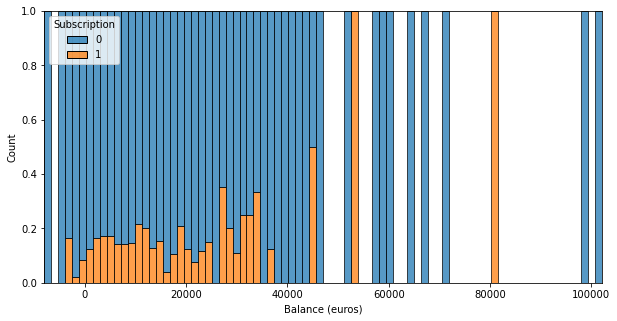

In [35]:
plt.figure(figsize = (10, 5))
sns.histplot(data=data,
             x = "Balance (euros)",
             hue = "Subscription",
             multiple = "fill",
             bins = 80)
plt.show()

Otra forma de modelar esta variable es separar los valores negativos de los positivos. En este caso tendríamos una variable que representa el balance negativo y otra que representa el balance positivo.

Cuando separamos las distribuciones podemos trabajar con la transformación logarítmica.

Otra opción es pasar la del balance negativo y/o 0 a una variable categórica.

In [36]:
data["Balance_neg"] = (data["Balance (euros)"].
                       where(data["Balance (euros)"]<0, 0.01).
                       mask(data["Balance (euros)"]<0, -data["Balance (euros)"]))

data["Balance_pos"] = (data["Balance (euros)"].
                       mask(data["Balance (euros)"]<=0, 0.01))

data["Balance_neg_cat"] = data["Balance (euros)"] < 0

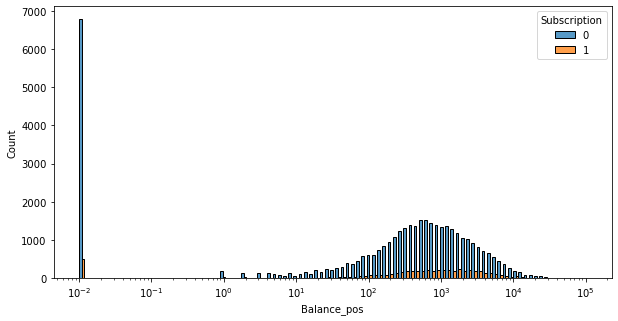

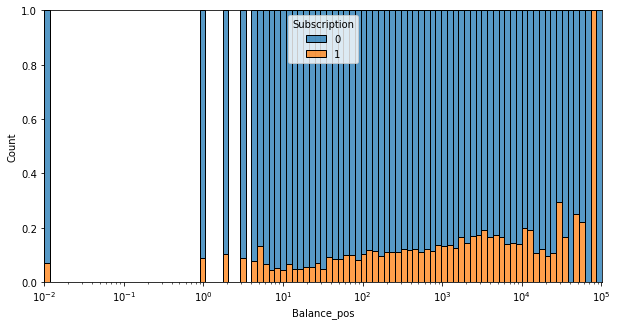

In [37]:
plt.figure(figsize = (10, 5))
sns.histplot(data=data,
             x = "Balance_pos",
             hue = "Subscription",
             multiple = "dodge", 
             log_scale = True)
plt.show()

plt.figure(figsize = (10, 5))
sns.histplot(data=data,
             x = "Balance_pos",
             hue = "Subscription",
             multiple = "fill", 
             log_scale = True)
plt.show()

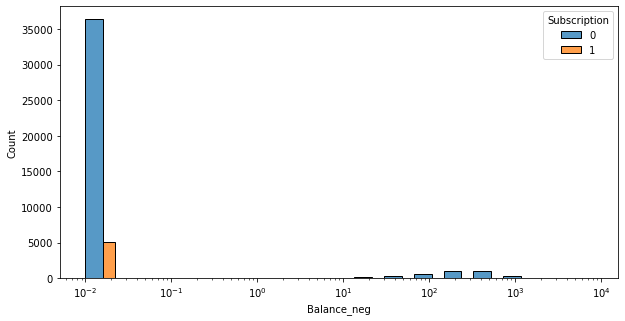

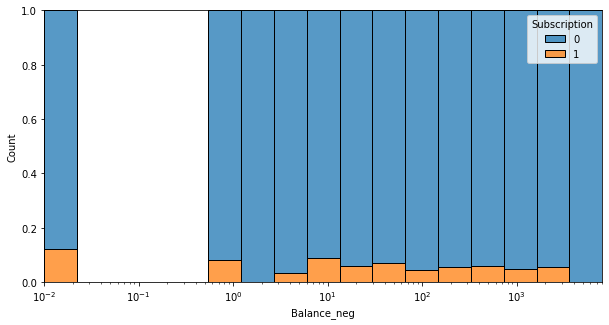

In [38]:
plt.figure(figsize = (10, 5))
sns.histplot(data=data,
             x = "Balance_neg",
             hue = "Subscription",
             multiple = "dodge", 
             log_scale = True)
plt.show()

plt.figure(figsize = (10, 5))
sns.histplot(data=data,
             x = "Balance_neg",
             hue = "Subscription",
             multiple = "fill", 
             log_scale = True)
plt.show()

In [39]:
data["Balance_neg_cat"].value_counts()

False    41445
True      3766
Name: Balance_neg_cat, dtype: int64

## Housing Loan

Variable que indica si tenes un préstamo de vivienda (hipoteca).

* Vemos una diferencia significativa entre las categorías de esta variable contra la respuesta.

yes    0.555838
no     0.444162
Name: Housing Loan, dtype: float64


Housing Loan,no,yes
Subscription,,
0,16727,23195
1,3354,1935


Housing Loan,no,yes
Subscription,,
0,0.832976,0.923
1,0.167024,0.077


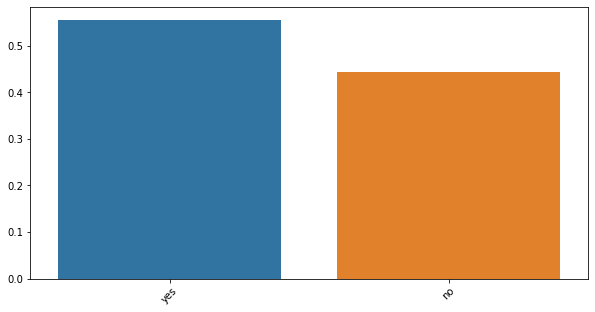

In [40]:
plotCat('Housing Loan')

## Personal Loan

Variable que indica si la persona tiene un préstamo personal.

* Distribución similar a la anterior.

no     0.839774
yes    0.160226
Name: Personal Loan, dtype: float64


Personal Loan,no,yes
Subscription,,
0,33162,6760
1,4805,484


Personal Loan,no,yes
Subscription,,
0,0.873443,0.933186
1,0.126557,0.066814


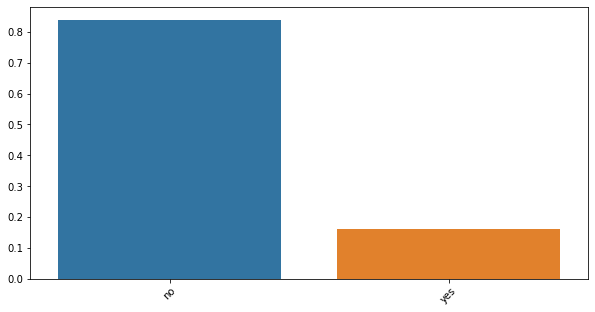

In [41]:
plotCat('Personal Loan')

## Contact

Tipo de contacto vinculado a la **última** comunicación en la campaña **actual**.

* Hay una clara diferencia en la categoría **unknown** pero no está clara la interpretación de ese valor faltante.

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: Contact, dtype: float64


Contact,cellular,telephone,unknown
Subscription,,,
0,24916,2516,12490
1,4369,390,530


Contact,cellular,telephone,unknown
Subscription,,,
0,0.850811,0.865795,0.959293
1,0.149189,0.134205,0.040707


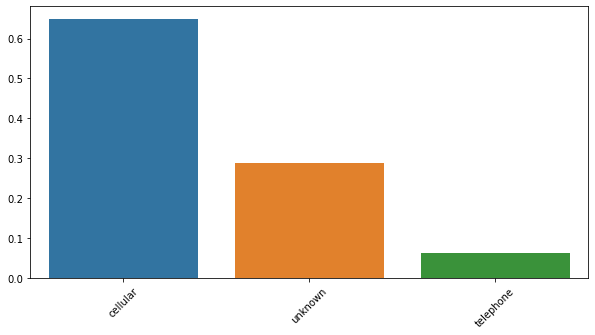

In [42]:
plotCat('Contact')

Vemos que prácticamente todas las observaciones tienen duración de último contacto, por lo que hubo un contacto pero no se conoce por qué vía se dio.

In [43]:
pd.crosstab(index=data["Last Contact Duration"]==0, columns=data["Contact"] == 'unknown')

Contact,False,True
Last Contact Duration,,
False,32189,13019
True,2,1


## Last Contact Day

Último día de contacto en la campaña **actual** para el mes indicado.

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: Last Contact Day, dtype: float64


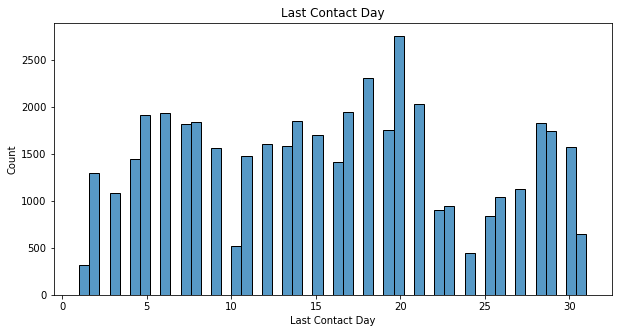

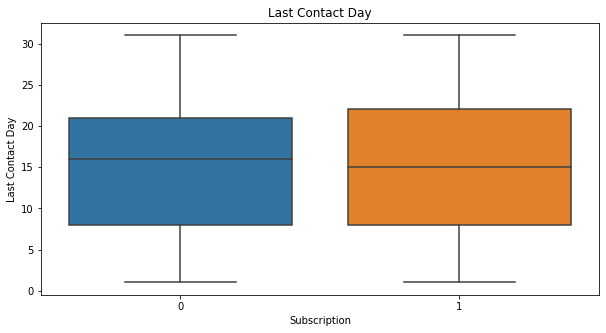

In [44]:
plotCont('Last Contact Day')

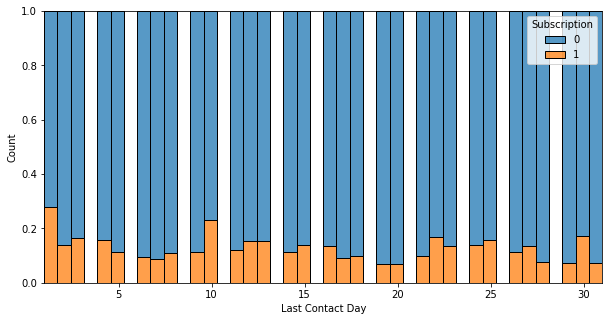

In [45]:
plt.figure(figsize = (10, 5))
sns.histplot(data=data,
             x = "Last Contact Day",
             hue = "Subscription",
             multiple = "fill")
plt.show()

Podemos ver si hay influencia de la semana del mes de contacto. Vemos una menor efectividad en la tercera semana del mes.

In [46]:
last_contact_day_cut = pd.cut(data["Last Contact Day"], bins=[0, 7, 14, 21, 31])
pd.crosstab(index = data["Subscription"],
            columns = last_contact_day_cut, normalize='columns')

Last Contact Day,"(0, 7]","(7, 14]","(14, 21]","(21, 31]"
Subscription,,,,
0,0.874158,0.868129,0.90295,0.879866
1,0.125842,0.131871,0.09705,0.120134


In [47]:
data["Last Contact Day_cat"] = pd.cut(data["Last Contact Day"], bins=[0, 7, 14, 21, 31])

## Last Contact Month

Mes del último contacto en la campaña **actual**.

* Los meses de menor frecuencia tienen una distribución de la variable respuesta muy diferente.

* Se podría agrupar las últimas frecuencias en una categoría *otros*.

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: Last Contact Month, dtype: float64


Last Contact Month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
Subscription,,,,,,,,,,,,
0,2355,5559,114,2208,1261,6268,4795,229,12841,3567,415,310
1,577,688,100,441,142,627,546,248,925,403,323,269


Last Contact Month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
Subscription,,,,,,,,,,,,
0,0.803206,0.889867,0.53271,0.833522,0.898788,0.909065,0.897772,0.480084,0.932805,0.898489,0.562331,0.535406
1,0.196794,0.110133,0.46729,0.166478,0.101212,0.090935,0.102228,0.519916,0.067195,0.101511,0.437669,0.464594


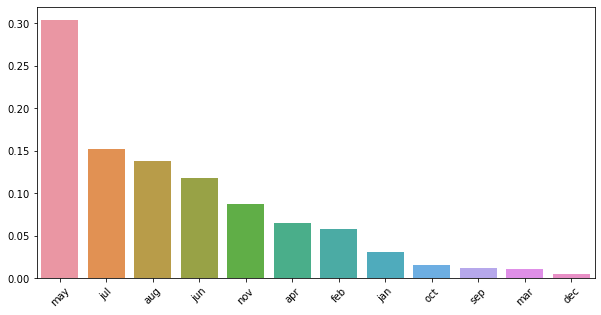

In [48]:
plotCat('Last Contact Month')

Agrupamos los meses de menor frecuencia en la categoría otros.

In [49]:
other_months = ["oct", "sep", "mar", "dec"]
data["Last Contact Month"] = data["Last Contact Month"].mask(data["Last Contact Month"].isin(other_months), 'other')

may      0.304483
jul      0.152507
aug      0.138174
jun      0.118135
nov      0.087810
apr      0.064851
feb      0.058592
other    0.044414
jan      0.031032
Name: Last Contact Month, dtype: float64


Last Contact Month,apr,aug,feb,jan,jul,jun,may,nov,other
Subscription,,,,,,,,,
0,2355,5559,2208,1261,6268,4795,12841,3567,1068
1,577,688,441,142,627,546,925,403,940


Last Contact Month,apr,aug,feb,jan,jul,jun,may,nov,other
Subscription,,,,,,,,,
0,0.803206,0.889867,0.833522,0.898788,0.909065,0.897772,0.932805,0.898489,0.531873
1,0.196794,0.110133,0.166478,0.101212,0.090935,0.102228,0.067195,0.101511,0.468127


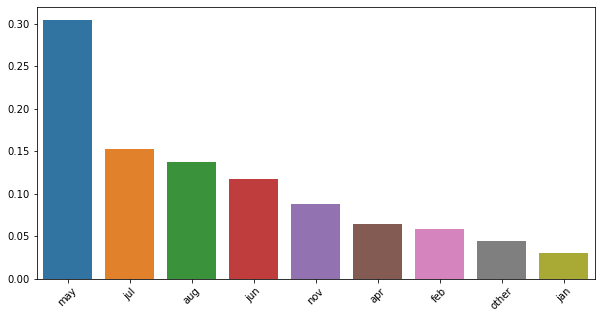

In [50]:
plotCat('Last Contact Month')

## Last Contact Duration

Duración del último contacto en la campaña **actual**.

* Vemos un cambio en la distribución para los casos donde hubo suscripción. 

A mayor duración del último contacto claramente vemos un aumento en la proporción de éxito en la campaña.

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: Last Contact Duration, dtype: float64


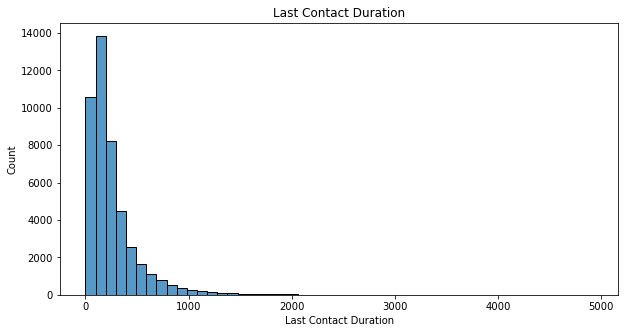

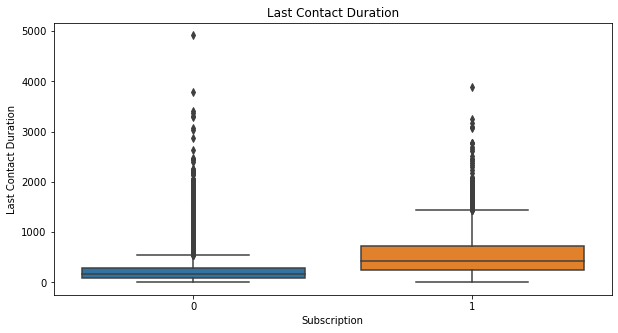

In [51]:
plotCont('Last Contact Duration')

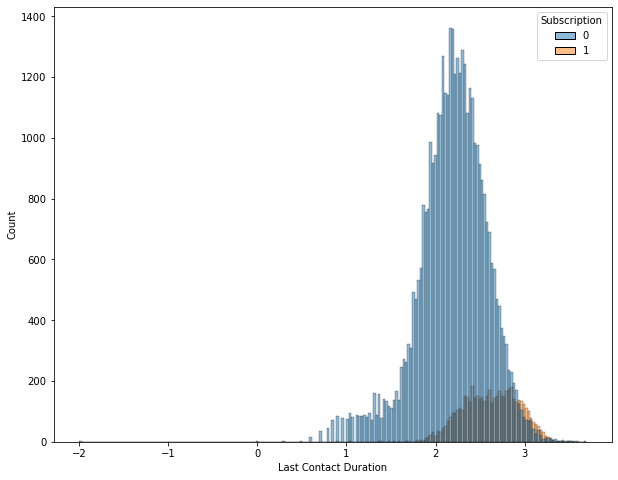

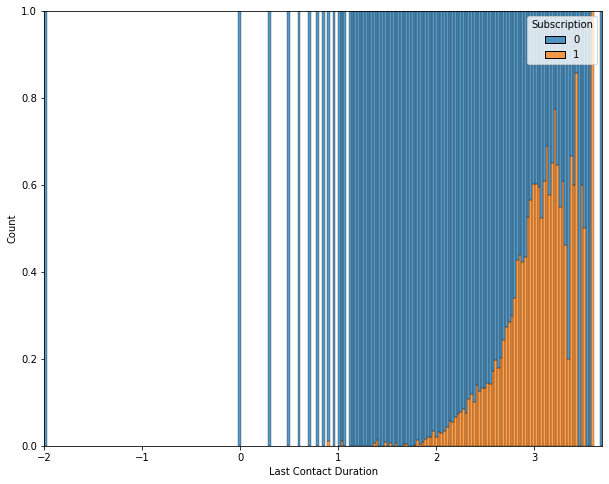

In [52]:
plt.figure(figsize=(10,8))
sns.histplot(x=np.log10(data["Last Contact Duration"]+0.01), hue = data["Subscription"])
plt.show()

plt.figure(figsize=(10,8))
sns.histplot(x=np.log10(data["Last Contact Duration"]+0.01), hue = data["Subscription"], multiple = 'fill')
plt.show()

## Campaign

Número de contactos en la campaña **actual** para ese cliente. 

* Vemos que a mayor cantidad de contactos menor proporción de éxito en la campaña.

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: Campaign, dtype: float64


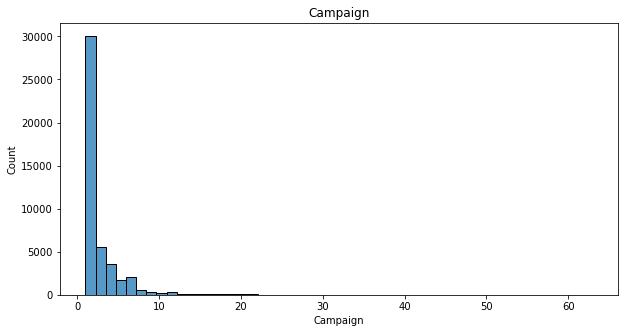

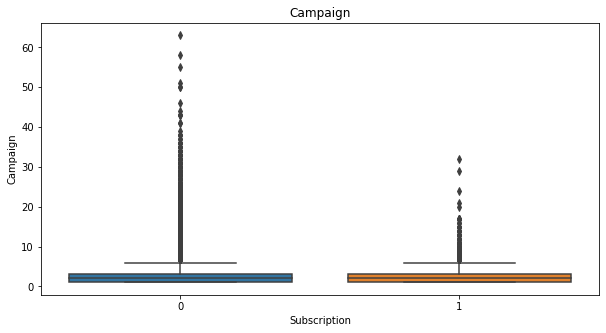

In [53]:
plotCont('Campaign', log=False)

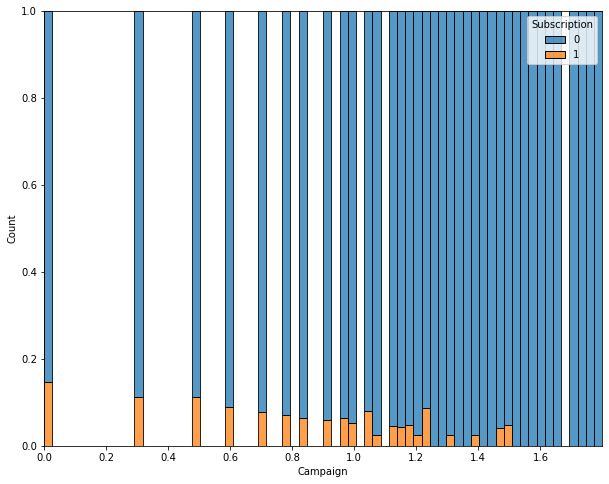

In [54]:
plt.figure(figsize=(10,8))
sns.histplot(x=np.log10(data["Campaign"]), hue = data["Subscription"], multiple = 'fill')
plt.show()

# Variables P - Campañas Anteriores

Estas variables tienen una alta cantidad de valores faltantes porque la gran mayoria de los clientes de la campaña actual no participaron de campañas anteriores. 

Es importante remarcar que tiene demasiados valores faltantes para utilizarlas pero que aportan información importante, por lo que más adelante mostraremos cómo incluirlas en el análisis.

### Pdays

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: Pdays, dtype: float64


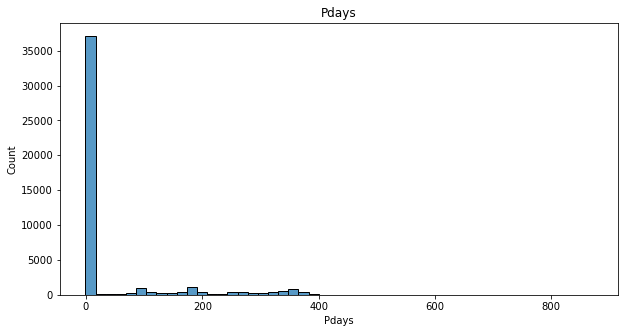

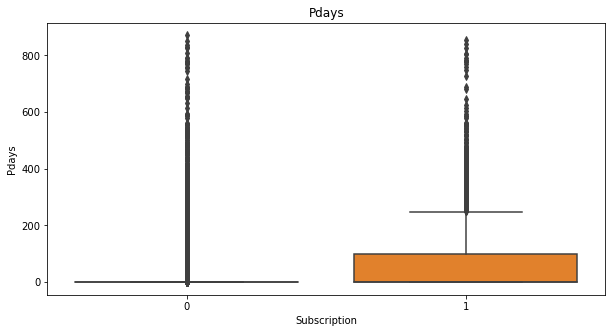

In [55]:
plotCont('Pdays')

### Previous

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: Previous, dtype: float64


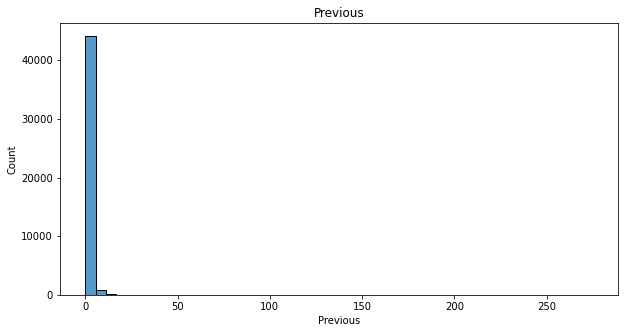

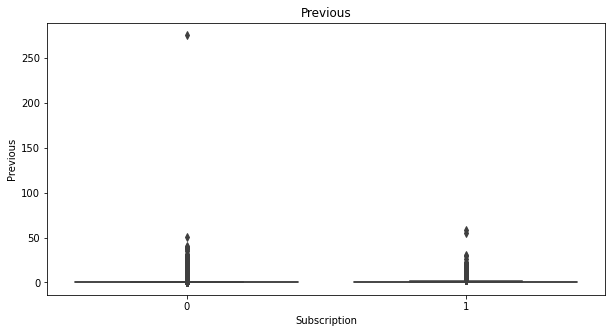

In [56]:
plotCont('Previous')

### Poutcome

El 80% de los datos son faltantes porque los clientes no participaron de campañas anteriores.

Vemos que esta variable resulta importante, dependiendo del resultado de la campaña anterior vemos que hay una variación en la proporción respecto a la variable respuesta.

In [57]:
pd.crosstab(index=data["Poutcome"]=='unknown',
            columns=data["Subscription"],
            normalize="index")

Subscription,0,1
Poutcome,,
False,0.769389,0.230611
True,0.908385,0.091615


unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: Poutcome, dtype: float64


Poutcome,failure,other,success,unknown
Subscription,,,,
0,4283,1533,533,33573
1,618,307,978,3386


Poutcome,failure,other,success,unknown
Subscription,,,,
0,0.873903,0.833152,0.352747,0.908385
1,0.126097,0.166848,0.647253,0.091615


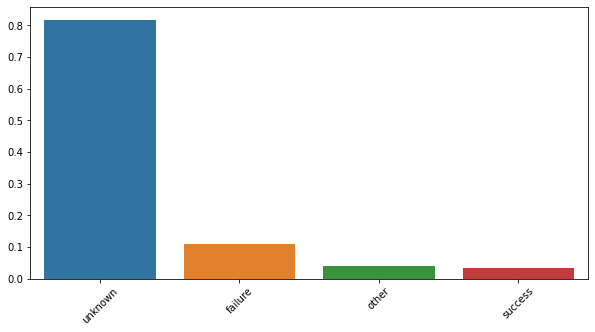

In [58]:
plotCat('Poutcome')

## Subscription

Vemos una distribución asimétrica de la variable respuesta, solamente con un 10 % de casos positivos.

0    0.883015
1    0.116985
Name: Subscription, dtype: float64


Subscription,0,1
Subscription,,
0,39922,0
1,0,5289


Subscription,0,1
Subscription,,
0,1.0,0.0
1,0.0,1.0


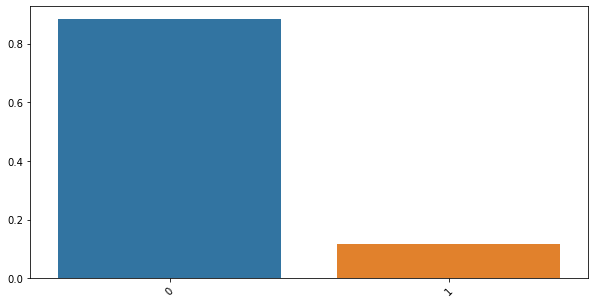

In [59]:
plotCat("Subscription")

## Otros Gráficos

A mayor duración del último contacto y a menor número de contactos en la campaña parece más probable la suscripción del cliente.

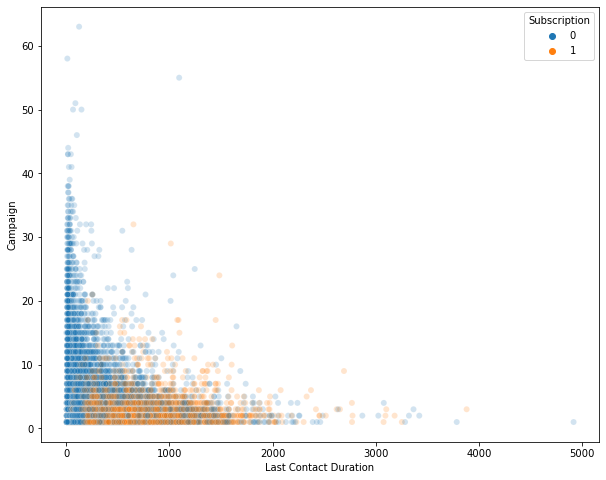

In [60]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = data,
                x = "Last Contact Duration",
                y = "Campaign", 
                hue = "Subscription",
                alpha = 0.2)
plt.show()

Con la siguiente función podemos comparar la proporción de éxito en la campaña entre variables categóricas usando heatmaps.

In [61]:
def catHeatmap(cat1, cat2, prop = False, ticks = None, labels = None):
  tab = pd.crosstab(index=cat1,
                    columns=cat2,
                    values = data["Subscription"],
                    aggfunc = 'mean',
                    normalize=prop)
  
  plt.figure(figsize = (10,8))
  sns.heatmap(tab)
  plt.show()
  
  return tab


Podemos ver un heatmap para entender la relación de la proporción de la variable respuesta (color) según la semana y el mes del último contacto.

Los meses entre septiembre y marzo (varios agrupados en other) tienen una proporción más alta de éxitos en el ingreso al plazo fijo.

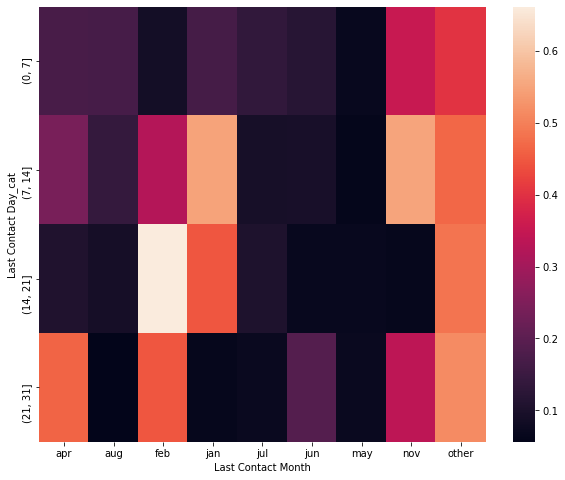

Last Contact Month,apr,aug,feb,jan,jul,jun,may,nov,other
Last Contact Day_cat,,,,,,,,,
"(0, 7]",0.170659,0.168654,0.087798,0.166667,0.135458,0.119750,0.069654,0.353535,0.402299
"(7, 14]",0.241026,0.139864,0.325203,0.550000,0.093267,0.095579,0.061964,0.551220,0.468880
"(14, 21]",0.105988,0.091478,0.661157,0.448276,0.104152,0.070103,0.068060,0.065596,0.484848
"(21, 31]",0.462825,0.056233,0.447552,0.065217,0.072364,0.190184,0.071673,0.339623,0.514783


In [62]:
catHeatmap(data["Last Contact Day_cat"],
           data["Last Contact Month"])

Vemos que cuando tenes algún tipo de préstamo la probabilidad de entrar en un Plazo Fijo disminuye. Con este gráfico podemos ver que en caso de tener los dos préstamos la probabilidad es incluso menor.

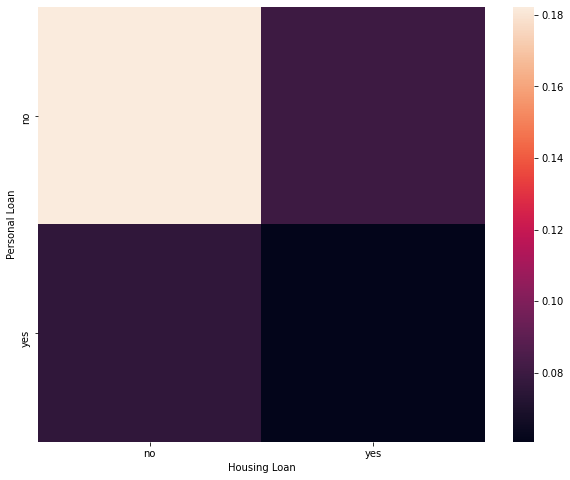

Housing Loan,no,yes
Personal Loan,,
no,0.182225,0.080432
yes,0.076121,0.060682


In [63]:
catHeatmap(data["Personal Loan"],
           data["Housing Loan"])

Los clientes solteros tienen muchas más chances de iniciar el plazo fijo. Además esto crece cuanto mayor sea su nivel de estudio.

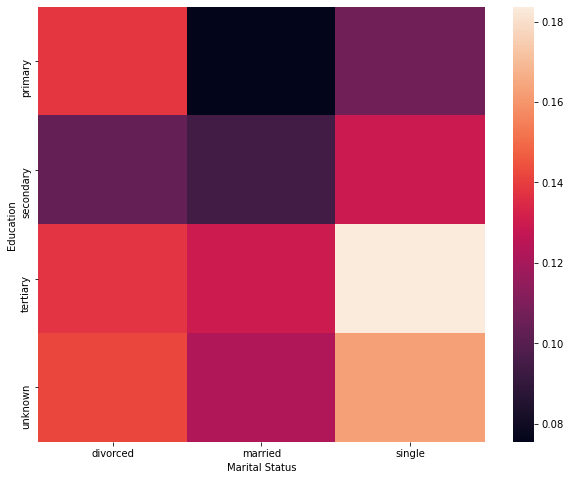

Marital Status,divorced,married,single
Education,,,
primary,0.138298,0.075486,0.106682
secondary,0.103375,0.094699,0.129213
tertiary,0.138001,0.129724,0.183639
unknown,0.142012,0.122414,0.162879


In [64]:
catHeatmap(data["Education"],
           data["Marital Status"])

Podemos ver lo mismo para los distintos oficios.

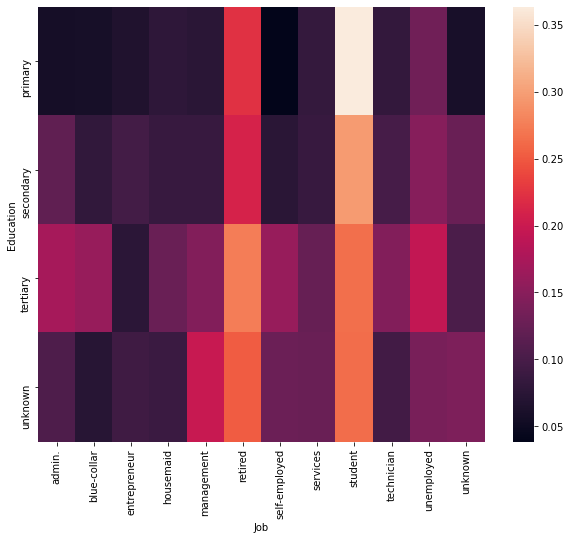

Job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Education,,,,,,,,,,,,
primary,0.057416,0.058010,0.065574,0.078150,0.074830,0.223899,0.038462,0.084058,0.363636,0.082278,0.132296,0.058824
secondary,0.118986,0.080618,0.095941,0.086076,0.086530,0.210366,0.074523,0.085623,0.297244,0.099063,0.148352,0.126761
tertiary,0.173077,0.161074,0.075802,0.127168,0.145366,0.275956,0.160864,0.123762,0.264574,0.145325,0.193772,0.102564
unknown,0.105263,0.072687,0.092105,0.088889,0.198347,0.252101,0.128205,0.126667,0.263804,0.095041,0.137931,0.141732


In [65]:
catHeatmap(data["Education"],
           data["Job"])

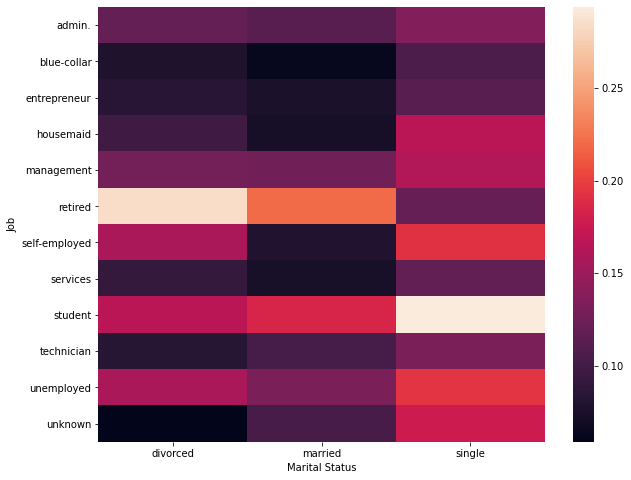

Marital Status,divorced,married,single
Job,,,
admin.,0.120000,0.113628,0.135995
blue-collar,0.077333,0.062715,0.105760
entrepreneur,0.083799,0.075701,0.113445
housemaid,0.097826,0.073465,0.166667
management,0.127813,0.126111,0.162199
retired,0.284706,0.220682,0.120370
self-employed,0.157143,0.079557,0.192825
services,0.091075,0.073951,0.117696
student,0.166667,0.185185,0.293850


In [66]:
catHeatmap(data["Job"],
           data["Marital Status"])

Salvo por las variables redundantes creadas con la variable balance no vemos grandes correlaciones entre las variables continuas.

<AxesSubplot:>

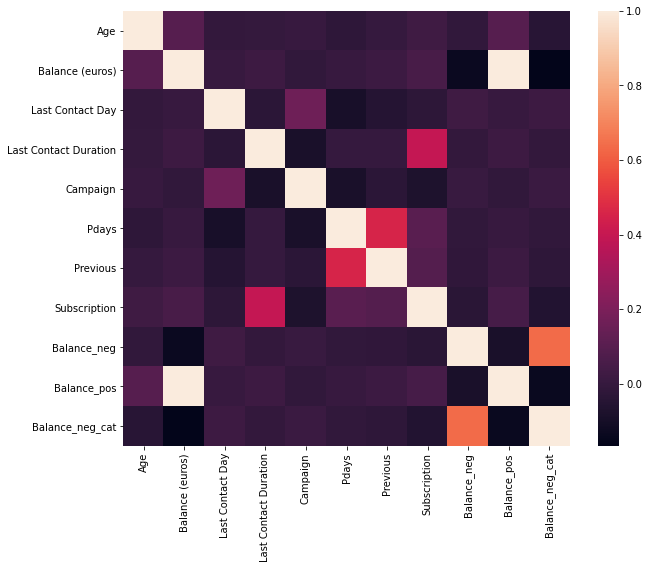

In [67]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr())

# Preparación del Dataset

Volvemos a importar el dataset y aplicamos las siguientes transformaciones:

* Construcción, transformacions y modificaciones de variables previamente realizadas.

* Creación de variables dummy para las categóricas.

* Partición del set de datos en train,  y test.

In [68]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [69]:
# Importamos el dataset nuevamente para hacer todas las modificaciones.
data_model = pd.read_csv("data/Bank Marketing.csv", sep=';')

In [70]:
# Corregimos las clases de la variable respuesta.
data_model["Subscription"] = data_model['Subscription'].map({2:1, 1:0})

In [71]:
# Creamos una variable dummy para mayores de 60 años.
data_model["Age_60"] = data_model["Age"] > 60

# Agrupamos trabajos menos frecuentes en una categoría "otros"
trabajo_frec = data_model["Job"].value_counts(normalize=True)
trabajos_otros = list(trabajo_frec.index[(trabajo_frec<0.05).values])
data_model["Job"] = data_model["Job"].mask(data_model["Job"].isin(trabajos_otros), "others")

# Eliminamos la variable Credit por tener muy baja frecuencia.
data_model.drop("Credit",axis=1, inplace=True)

# Dividimos la variable de balance en negativa como categórica y la transformación logarítmica en caso de que el balance sea positivo.
data_model["Balance_neg_cat"] = data_model["Balance (euros)"] < 0
data_model["Balance_pos_log"] = np.log10(data_model["Balance (euros)"].mask(data_model["Balance (euros)"]<=0, 0.01))
data_model.drop("Balance (euros)", axis=1, inplace=True)


# Eliminamos la variable contacto por la gran cantidad de valores faltantes.
data_model.drop("Contact", axis = 1, inplace = True)

# Reemplazamos la variable de último contacto en dias por 4 intervalos representando las semanas del mes.
data_model["Last Contact Day Cat"] = pd.cut(data_model["Last Contact Day"], bins=[0, 7, 14, 21, 31])
data_model.drop("Last Contact Day", axis =1, inplace=True)

# Agrupamos los meses de baja frecuencia en una categoría nueva.
other_months = ["oct", "sep", "mar", "dec"]
data_model["Last Contact Month"] = data_model["Last Contact Month"].mask(data_model["Last Contact Month"].isin(other_months), 'other')

# Le aplicamos la transformación logarítmica a la duración del último contacto.
data_model["Last Contact Duration Log"] = np.log10(data_model["Last Contact Duration"]+0.01)
data_model.drop("Last Contact Duration", axis = 1, inplace = True)

# Le aplicamos la transformación logarítmica a la cantidad de contactos de la campaña.
data_model["Campaign Log"] = np.log10(data_model["Campaign"]+0.01)
data_model.drop("Campaign", axis = 1, inplace = True)

In [72]:
# Vemos la cantidad de valores faltantes.
(data_model=='unknown').sum()

Age                              0
Job                              0
Marital Status                   0
Education                     1857
Housing Loan                     0
Personal Loan                    0
Last Contact Month               0
Pdays                            0
Previous                         0
Poutcome                     36959
Subscription                     0
Age_60                           0
Balance_neg_cat                  0
Balance_pos_log                  0
Last Contact Day Cat             0
Last Contact Duration Log        0
Campaign Log                     0
dtype: int64

Imputamos los datos faltantes de la variable Education con la categoría de mayor frecuencia por tratarse de pocas observaciones.

In [73]:
# Iniciamos el imputador
imp = SimpleImputer(missing_values='unknown',
                    strategy='most_frequent')

In [74]:
# Transformamos la columna con el valor aprendido por el imputador.
data_model["Education"] = imp.fit_transform(data_model["Education"].values.reshape(-1,1)).ravel()

Pasamos las variables categóricas a dummies. A las variables binarias les dijamos una única columna.

In [75]:
# Variables categóricas de múltiples clases.
cat_vars = ["Job", "Marital Status", "Education", "Last Contact Month", "Last Contact Day Cat"]

for var in cat_vars:
  data_model = pd.concat([data_model, pd.get_dummies(data_model[var], prefix=var)], axis=1)
  data_model.drop(var, axis=1, inplace=True)

In [76]:
# Variables categóricas binarias.
cat_vars2 = ["Housing Loan", "Personal Loan", "Age_60", "Balance_neg_cat"]

for var in cat_vars2:
  data_model = pd.concat([data_model, pd.get_dummies(data_model[var], prefix=var, drop_first=True)], axis=1)
  data_model.drop(var, axis=1, inplace=True)

In [77]:
# Generamos las variables dummies de la variable Poutcome.
data_model = pd.concat([data_model, pd.get_dummies(data_model["Poutcome"], prefix="Poutcome")], axis = 1)
data_model.drop("Poutcome", axis=1,  inplace=True)

In [78]:
# Mezclamos las observaciones del dataset.
data_model = data_model.sample(frac = 1, random_state=35).reset_index(drop = True)

In [79]:
# Dividimos el set de datos en Train (entrenamiento) y Test (evaluación).
train, test = train_test_split(data_model, train_size = 0.75, random_state = 42, stratify = data_model['Subscription'])

In [80]:
#train.to_csv("data/Train_full.csv")
#test.to_csv("data/Test_full.csv")

Además generamos un dataset que **no** contiene las variables de campañas anteriores. De esta manera podemos tunnear y entrenar modelos para clasificar clientes.

In [81]:
# Variables de campañas anteriores.
P_vars = ["Pdays", "Previous", "Poutcome_failure", "Poutcome_other", "Poutcome_success", "Poutcome_unknown"]
train_base = train.drop(P_vars, axis = 1)
test_base = test.drop(P_vars, axis = 1)

In [82]:
#train_base.to_csv("data/Train.csv")
#test_base.to_csv("data/Test.csv")

In [83]:
print(data_model.shape)
print(train.shape)
print(test.shape)

(45211, 41)
(33908, 41)
(11303, 41)


# Modelos

Los modelos que fueron probados para la predicción de los datos fueron modelos de regresión logística con regularización y modelos de árboles. KNN fue probado pero resultó demasiado ineficiente por la escala del dataset.

* Regresión Logística (Penalización L2)
* Árbol de Clasificación
* Random Forest
* Gradient Boosting

Para cada modelo se usó 5-fold Cross-Validation con el train set optimizando la función de profit definida por la matriz de ingresos y costos del enunciado. De esta manera la métrica optimizada fue el profit promedio para la selección de mejores hiperparámetros.

Hasta este Notebook los modelos no han visto el set de Test y sólamente fueron optimizados con los datos de entrenamiento.

Siempre que estuviera disponible fue optimizado el hiperparámetro *class_weight* que permite darle un mayor peso a la categoría minoritaria.

In [84]:
from sklearn.metrics import confusion_matrix

# Función de profit medio según predicción y valores de respuesta verdaderos.
def profit_mean(y_true, y_pred):
  mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
  n = len(y_true)
  prof = 250 * mat[1,1] - 50 * mat[0,1] - 25 * mat[1,0]
  return prof/n

In [85]:
X_train_base = train_base.drop("Subscription", axis = 1)
y_train = train_base["Subscription"]

## Modelo Logístico

Escalamos las variables para entrenar el modelo logístico.

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [88]:
X_train_base_s = scaler.fit_transform(X_train_base)

In [89]:
logistic = LogisticRegression(penalty = 'l2',
                              C = 0.00119,
                              class_weight = {1:6.4},
                              n_jobs=-1,
                              max_iter=10000,
                              random_state=65)

In [90]:
logistic.fit(X_train_base_s, y_train)

LogisticRegression(C=0.00119, class_weight={1: 6.4}, max_iter=10000, n_jobs=-1,
                   random_state=65)

## Modelo Árbol de Clasificación

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
tree = DecisionTreeClassifier(ccp_alpha = 0,
                              criterion = 'gini',
                              max_depth = None,
                              max_features = None,
                              max_leaf_nodes = 40,
                              min_samples_leaf = 1,
                              splitter = 'best',
                              class_weight = {1:6},
                              random_state = 43)

In [93]:
tree.fit(X_train_base, y_train)

DecisionTreeClassifier(ccp_alpha=0, class_weight={1: 6}, max_leaf_nodes=40,
                       random_state=43)

## Modelo Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
gbm = GradientBoostingClassifier(ccp_alpha = 0,
                                 criterion = 'friedman_mse',
                                 max_depth = None, 
                                 max_features = 0.7,
                                 max_leaf_nodes = 40,
                                 min_samples_leaf = 200,
                                 n_estimators = 1000,
                                 validation_fraction = 0.1,
                                 n_iter_no_change = 15,
                                 loss = 'deviance',
                                 random_state = 65,
                                 verbose=0)

In [96]:
gbm.fit(X_train_base, y_train)

GradientBoostingClassifier(ccp_alpha=0, max_depth=None, max_features=0.7,
                           max_leaf_nodes=40, min_samples_leaf=200,
                           n_estimators=1000, n_iter_no_change=15,
                           random_state=65)

## Modelo Random Forest

Fueron probados 2466 sets de hiperparámetros diferentes.

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf = RandomForestClassifier(n_estimators = 100,
                            ccp_alpha = 0,
                            criterion = 'gini',
                            max_depth = 16,
                            max_features = 0.5,
                            max_leaf_nodes = 260, 
                            min_samples_leaf = 1,
                            class_weight = {1:7},
                            n_jobs=-1, 
                            random_state=45)

In [99]:
rf.fit(X_train_base, y_train)

RandomForestClassifier(ccp_alpha=0, class_weight={1: 7}, max_depth=16,
                       max_features=0.5, max_leaf_nodes=260, n_jobs=-1,
                       random_state=45)

# Evaluación de Modelos

Teniendo los mejores modelos conseguidos entrenados podemos realizar las predicciones sobre el set de Test para evaluarlos y quedarnos con el mejor de ellos.

In [100]:
from sklearn.metrics import confusion_matrix, f1_score

In [101]:
# Preparamos es set de test.
X_test_base = test_base.drop("Subscription", axis = 1)
y_test = test_base["Subscription"]

In [102]:
# Escalamos los datos para la Regresión Logística.
X_test_base_s = scaler.fit_transform(X_test_base)

In [103]:
# Para cada modelo se guardan los valores de F1 y Mean Profit para el set de entrenamiento y de testeo.
models = [logistic, tree, gbm, rf]
names = ["Logistic", "Tree", "GradientBoosting", "RandomForest"]

df_results1 = pd.DataFrame(np.zeros((4,4)), columns = ["Model", "Mean_Profit", "F1", "Data"])
df_results2 = pd.DataFrame(np.zeros((4,4)), columns = ["Model", "Mean_Profit", "F1", "Data"])

for i, model in enumerate(models):
  if i == 0:
    y_pred = model.predict(X_test_base_s)
    profit = profit_mean(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
  else:
    y_pred = model.predict(X_test_base)
    profit = profit_mean(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

  df_results1.iloc[i] = [names[i], profit, f1, "Test"]

for i, model in enumerate(models):
  if i == 0:
    y_pred = model.predict(X_train_base_s)
    profit = profit_mean(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
  else:
    y_pred = model.predict(X_train_base)
    profit = profit_mean(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

  df_results2.iloc[i] = [names[i], profit, f1, "Train"]

# Se agrupan los resultados en un único dataset.
df_results = pd.concat([df_results1, df_results2], axis = 0).reset_index(drop = True)

In [104]:
df_results

,Model,Mean_Profit,F1,Data
0,Logistic,15.026984,0.511628,Test
1,Tree,15.040255,0.517964,Test
2,GradientBoosting,9.183403,0.502234,Test
3,RandomForest,16.455808,0.552549,Test
4,Logistic,14.647723,0.504013,Train
5,Tree,15.375428,0.521660,Train
6,GradientBoosting,11.770821,0.577356,Train
7,RandomForest,19.925976,0.611368,Train


Vemos 

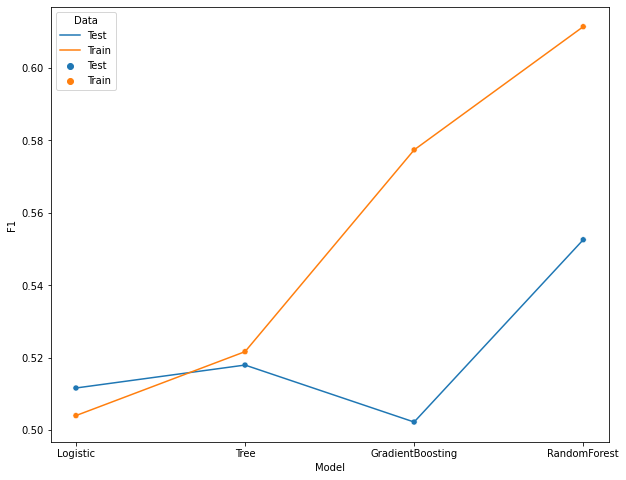

In [105]:
plt.figure(figsize = (10, 8))
sns.lineplot(data = df_results, x = "Model", y = "F1", hue = "Data")
sns.scatterplot(data = df_results, x = "Model", y = "F1", hue = "Data")
plt.show()

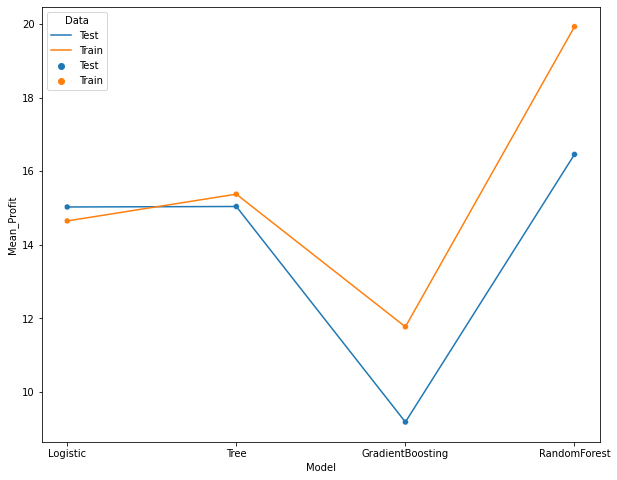

In [106]:
plt.figure(figsize = (10, 8))
sns.lineplot(data = df_results, x = "Model", y = "Mean_Profit", hue = "Data")
sns.scatterplot(data = df_results, x = "Model", y = "Mean_Profit", hue = "Data")
plt.show()

# Modelo Cascada

Todos los modelos anteriores fueron entrenados y predicen sobre los datos **base** que **no** incluyen las variables previas como *Pdays* y *Poutcome* por tener una baja cantidad de datos no faltantes. 

Como creemos que esa información tiene gran valor para la predicción de la entrada de un cliente en un plazo fijo para la campaña actual, pensamos probar armar un segundo modelo que corrija la predicción de probabilidad del modelo base (sin las variables de campaña anterior) usando la información de las variables previas y la predicción de dicho modelo base.

Para esto primero definimos nuestro mejor modelo como el modelo base, **rf_base**.



In [107]:
rf_base = rf

Generamos el set de entrenamiento del modelo **prev** entrenado con las variables previas y con la predicción del modelo base.

In [108]:
# Seleccionamos las variables previas.
P_vars = ["Pdays", "Previous", "Poutcome_failure", "Poutcome_other", "Poutcome_success", "Poutcome_unknown"]

# Agregamos la variable respuesta al dataset prev.
train_prev = pd.concat([train[P_vars], y_train], axis=1, ignore_index=False)
# Filtramos por las observaciones que no tengan unknown en el Poutcome (poseemos la información) y eliminamos la dummy de Poutcome_unknown.
train_prev = train_prev[train_prev["Poutcome_unknown"]==0].drop("Poutcome_unknown", axis = 1)

# Vemos la dimensión parcial del set de entrenamiento.
print(train_prev.shape)

# Realizamos la predicción de las observaciones del train_prev con el modelo base.
base_pred = pd.Series(rf_base.predict_proba(X_train_base)[:,1], index=train_base.index, name="BasePrediction")
# Agregamos las predicciones al set de entrenamiento prev.
train_prev = pd.merge(left=train_prev, 
                      right=base_pred,
                      how='left',
                      left_index=True,
                      right_index=True)

(6202, 6)


Vemos el set de entrenamiento para el **modelo_prev**. Además de la variable respuesta tenemos las variables previas y la predicción para cada observación del modelo base. Recordamos que tenemos 6202 observaciones porque son las que la variable Poutcome no es igual a unknown.

In [109]:
print(train_prev.shape)
train_prev.head()

(6202, 7)


,Pdays,Previous,Poutcome_failure,Poutcome_other,Poutcome_success,Subscription,BasePrediction
12868,200,4,1,0,0,0,0.032148
9890,185,1,0,0,1,1,0.879782
4156,272,2,1,0,0,0,0.355511
18063,79,3,0,0,1,0,0.075283
29288,119,1,1,0,0,1,0.531321


In [110]:
# Preparamos los datos para entrenar al modelo.
X_train_prev = train_prev.drop("Subscription", axis = 1)
y_train_prev = train_prev["Subscription"]

Entrenamos al modelo previo **rf_prev**. Los hiperparámetros fueron seleccionados por 5-fold Cross-Validation al igual que el resto de los modelos.

In [111]:
rf_prev = RandomForestClassifier(n_estimators=150,
                            criterion = 'gini', 
                            max_depth = 3,
                            max_features = 0.5, 
                            max_leaf_nodes = 50, 
                            n_jobs = -1,
                            random_state = 45,
                            class_weight = {1:5}, 
                            ccp_alpha=0)

In [112]:
rf_prev.fit(X_train_prev, y_train_prev)

RandomForestClassifier(ccp_alpha=0, class_weight={1: 5}, max_depth=3,
                       max_features=0.5, max_leaf_nodes=50, n_estimators=150,
                       n_jobs=-1, random_state=45)

Definimos la función para obtener la predicción usando los dos modelos. En esta función se ingresa un dataframe que posee las todas las variables explicativas (tanto base como previas) transformadas y devuelve la predicción del modelo:

* Si la observación no tiene información previa la predicción es la del modelo base.

* Si la observación tiene información previa se realiza la predicción de probabilidad con el modelo base y se realiza la predicción final con la predicción del modelo base + las variables previas.

El argumento 

In [113]:
def cascadePrediction(data, proba = False):

  # Creamos la lista de variables previas.
  P_vars = ["Pdays", "Previous", "Poutcome_failure", "Poutcome_other", "Poutcome_success", "Poutcome_unknown"]

  # Generamos el subset base sin las variables previas.
  # Este permite calcular la predicción de probabilidad de todas las observaciones.
  df_base = data.drop(P_vars, axis = 1)

  # Realizamos la predicción de probabilidad de todas las observaciones con el modelo base.
  base_pred = pd.Series(rf_base.predict_proba(df_base)[:,1], index=df_base.index, name="BasePrediction")
  # Agregamos la predicción de probabilidad al dataset.
  data = pd.merge(left=data, 
                  right=base_pred,
                  how='left',
                  left_index=True,
                  right_index=True)

  # Generamos el subset con variables y observaciones previas.
  # Este permite corregir la predicción de las observaciones que tienen variables previas.
  df_prev = data[data["Poutcome_unknown"] == 0]
  df_prev = df_prev[P_vars+["BasePrediction"]].drop("Poutcome_unknown", axis = 1)

  # Realizamos la predicción de probabilidad con el modelo Prev y agregamos la predicción al dataframe.
  prev_pred = pd.Series(rf_prev.predict_proba(df_prev)[:,1], index=df_prev.index, name="PrevPrediction")
  data = pd.merge(left=data, 
                  right=prev_pred,
                  how='left',
                  left_index=True,
                  right_index=True)

  # Creamos una función que se queda con la predicción base si la previa es nan y con la previa si esta no es nan.
  take_prediction = lambda s1, s2: s1 if np.isnan(s2) else s2
  # Agregamos la predicción final de probabilidad al dataframe.
  data["Prediction_Proba"] = data["BasePrediction"].combine(data["PrevPrediction"], take_prediction)
  # Agregamos la predicción final con probabilidad de corte 0.5.
  data["Prediction"] = data["Prediction_Proba"].apply(lambda x: 1 if x >= 0.5 else 0)

  # Devolvemos la predicción según el argumento proba.
  if proba == False:
    return data["Prediction"]
  else:
    return data["Prediction_Proba"]

Para esta función debemos usar el dataframe transformado completo, con variables base y previas.

In [114]:
X_train = train.drop(["Subscription"], axis = 1)
X_test = test.drop(["Subscription"], axis = 1)

In [115]:
df_results = df_results.append({'Model':"Modelo Cascada", 
                                'Mean_Profit':profit_mean(y_train, cascadePrediction(X_train)),
                                'F1':f1_score(y_train, cascadePrediction(X_train)),
                                'Data':"Train"}, ignore_index = True)

df_results = df_results.append({'Model':"Modelo Cascada", 
                                'Mean_Profit':profit_mean(y_test, cascadePrediction(X_test)),
                                'F1':f1_score(y_test, cascadePrediction(X_test)),
                                'Data':"Test"}, ignore_index = True)
df_results

,Model,Mean_Profit,F1,Data
0,Logistic,15.026984,0.511628,Test
1,Tree,15.040255,0.517964,Test
2,GradientBoosting,9.183403,0.502234,Test
3,RandomForest,16.455808,0.552549,Test
4,Logistic,14.647723,0.504013,Train
5,Tree,15.375428,0.521660,Train
6,GradientBoosting,11.770821,0.577356,Train
7,RandomForest,19.925976,0.611368,Train
8,Modelo Cascada,20.607969,0.609792,Train
9,Modelo Cascada,17.738653,0.563899,Test


Vemos la ventaja de incluir la corrección de la probabilidad del modelo base.

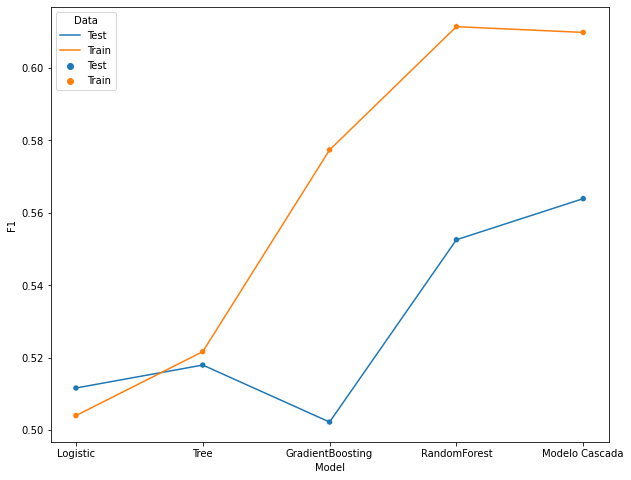

In [116]:
plt.figure(figsize = (10, 8))
sns.lineplot(data = df_results, x = "Model", y = "F1", hue = "Data")
sns.scatterplot(data = df_results, x = "Model", y = "F1", hue = "Data")
plt.show()

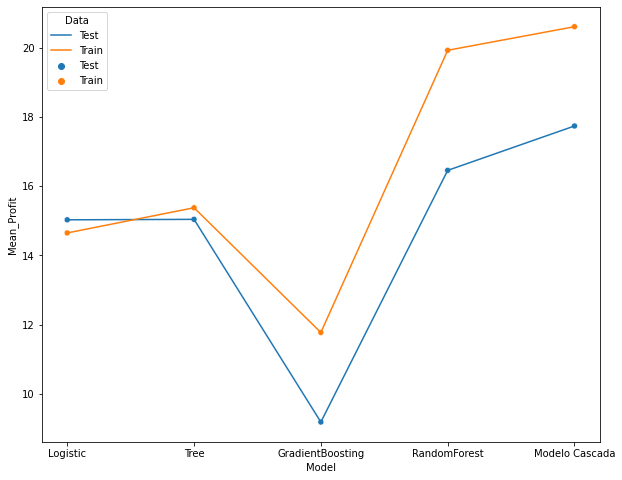

In [117]:
plt.figure(figsize = (10, 8))
sns.lineplot(data = df_results, x = "Model", y = "Mean_Profit", hue = "Data")
sns.scatterplot(data = df_results, x = "Model", y = "Mean_Profit", hue = "Data")
plt.show()

Podemos ver la mejora de la inclusión del modelo prev en la predicción frente al uso únicamente del modelo base.

In [118]:
print(profit_mean(y_test, rf_base.predict(X_test_base)))
print(profit_mean(y_test, rf_base.predict(X_test_base))*len(y_test))
print(confusion_matrix(y_test, rf_base.predict(X_test_base)))

16.45580819251526
185999.99999999997
[[8521 1460]
 [ 260 1062]]


In [119]:
print(profit_mean(y_test, cascadePrediction(X_test)))
print(profit_mean(y_test, cascadePrediction(X_test))*len(y_test))
print(confusion_matrix(y_test, cascadePrediction(X_test)))

17.738653454835
200500.0
[[8415 1566]
 [ 188 1134]]


# Predicción con Modelo Cascada

Para realizar predicciones de nuevas observaciones vamos a entrenar los modelos con la totalidad de los datos brindados para el TP.





In [120]:
# Seleccionamos las variables previas.
P_vars = ["Pdays", "Previous", "Poutcome_failure", "Poutcome_other", "Poutcome_success", "Poutcome_unknown"]

X_train_full_base = data_model.drop(P_vars+["Subscription"], axis = 1)
y_train_full = data_model["Subscription"]

In [121]:
rf_base_full = RandomForestClassifier(n_estimators = 100,
                            ccp_alpha = 0,
                            criterion = 'gini',
                            max_depth = 16,
                            max_features = 0.5,
                            max_leaf_nodes = 260, 
                            min_samples_leaf = 1,
                            class_weight = {1:7},
                            n_jobs=-1, 
                            random_state=45)

In [122]:
rf_base_full.fit(X_train_full_base, y_train_full)

RandomForestClassifier(ccp_alpha=0, class_weight={1: 7}, max_depth=16,
                       max_features=0.5, max_leaf_nodes=260, n_jobs=-1,
                       random_state=45)

In [123]:
# Agregamos la variable respuesta al dataset prev.
train_full_prev = pd.concat([data_model[P_vars], y_train_full], axis=1, ignore_index=False)
# Filtramos por las observaciones que no tengan unknown en el Poutcome (poseemos la información) y eliminamos la dummy de Poutcome_unknown.
train_full_prev = train_full_prev[train_full_prev["Poutcome_unknown"]==0].drop("Poutcome_unknown", axis = 1)

# Vemos la dimensión parcial del set de entrenamiento.
print(train_full_prev.shape)

# Realizamos la predicción de las observaciones del train_prev con el modelo base.
base_pred_full = pd.Series(rf_base_full.predict_proba(X_train_full_base)[:,1], index=X_train_full_base.index, name="BasePrediction")
# Agregamos las predicciones al set de entrenamiento prev.
train_full_prev = pd.merge(left=train_full_prev, 
                      right=base_pred_full,
                      how='left',
                      left_index=True,
                      right_index=True)

(8252, 6)


In [124]:
print(train_full_prev.shape)
train_full_prev.head()

(8252, 7)


,Pdays,Previous,Poutcome_failure,Poutcome_other,Poutcome_success,Subscription,BasePrediction
0,92,3,0,0,1,1,0.473005
6,270,3,1,0,0,1,0.878511
9,346,3,1,0,0,0,0.075513
15,178,1,0,0,1,0,0.076155
17,92,2,0,0,1,1,0.750365


In [125]:
# Preparamos los datos para entrenar al modelo.
X_train_full_prev = train_full_prev.drop("Subscription", axis = 1)
y_train_full_prev = train_full_prev["Subscription"]

In [126]:
rf_prev_full = RandomForestClassifier(n_estimators=150,
                            criterion = 'gini', 
                            max_depth = 3,
                            max_features = 0.5, 
                            max_leaf_nodes = 50, 
                            n_jobs = -1,
                            random_state = 45,
                            class_weight = {1:5}, 
                            ccp_alpha=0)

In [127]:
rf_prev_full.fit(X_train_full_prev, y_train_full_prev)

RandomForestClassifier(ccp_alpha=0, class_weight={1: 5}, max_depth=3,
                       max_features=0.5, max_leaf_nodes=50, n_estimators=150,
                       n_jobs=-1, random_state=45)

Esta es la misma función desarrollada previamente pero la predicción se realiza con los modelos entrenados con todos los datos. Permite devolver la predicción de los modelos conjuntos de manera discreta o en probabilidad.

In [128]:
def cascadePredictionFull(data, proba = False):

  # Creamos la lista de variables previas.
  P_vars = ["Pdays", "Previous", "Poutcome_failure", "Poutcome_other", "Poutcome_success", "Poutcome_unknown"]

  # Generamos el subset base sin las variables previas.
  # Este permite calcular la predicción de probabilidad de todas las observaciones.
  df_base = data.drop(P_vars, axis = 1)

  # Realizamos la predicción de probabilidad de todas las observaciones con el modelo base.
  base_pred = pd.Series(rf_base_full.predict_proba(df_base)[:,1], index=df_base.index, name="BasePrediction")
  # Agregamos la predicción de probabilidad al dataset.
  data = pd.merge(left=data, 
                  right=base_pred,
                  how='left',
                  left_index=True,
                  right_index=True)

  # Generamos el subset con variables y observaciones previas.
  # Este permite corregir la predicción de las observaciones que tienen variables previas.
  df_prev = data[data["Poutcome_unknown"] == 0]
  df_prev = df_prev[P_vars+["BasePrediction"]].drop("Poutcome_unknown", axis = 1)

  # Realizamos la predicción de probabilidad con el modelo Prev y agregamos la predicción al dataframe.
  prev_pred = pd.Series(rf_prev_full.predict_proba(df_prev)[:,1], index=df_prev.index, name="PrevPrediction")
  data = pd.merge(left=data, 
                  right=prev_pred,
                  how='left',
                  left_index=True,
                  right_index=True)

  # Creamos una función que se queda con la predicción base si la previa es nan y con la previa si esta no es nan.
  take_prediction = lambda s1, s2: s1 if np.isnan(s2) else s2
  # Agregamos la predicción final de probabilidad al dataframe.
  data["Prediction_Proba"] = data["BasePrediction"].combine(data["PrevPrediction"], take_prediction)
  # Agregamos la predicción final con probabilidad de corte 0.5.
  data["Prediction"] = data["Prediction_Proba"].apply(lambda x: 1 if x >= 0.5 else 0)

  # Devolvemos la predicción según el argumento proba.
  if proba == False:
    return data["Prediction"]
  else:
    return data["Prediction_Proba"]

La siguiente función permite pasar un dataset entero a predecir (incluyendo la variable respuesta) y realizará las transformaciones necesarias para poder utilizarse en los modelos entrenados.

In [129]:
def prepareDataPrediction(data):

  # Corregimos las clases de la variable respuesta.
  data["Subscription"] = data['Subscription'].map({2:1, 1:0})

  # Creamos una variable dummy para mayores de 60 años.
  data["Age_60"] = data["Age"] > 60

  # Agrupamos trabajos menos frecuentes en una categoría "otros"
  trabajos_otros = ['self-employed','entrepreneur','unemployed','housemaid','student','unknown']
  data["Job"] = data["Job"].mask(data["Job"].isin(trabajos_otros), "others")

  # Eliminamos la variable Credit por tener muy baja frecuencia.
  data.drop("Credit",axis=1, inplace=True)

  # Dividimos la variable de balance en negativa como categórica y la transformación logarítmica en caso de que el balance sea positivo.
  data["Balance_neg_cat"] = data["Balance (euros)"] < 0
  data["Balance_pos_log"] = np.log10(data["Balance (euros)"].mask(data["Balance (euros)"]<=0, 0.01))
  data.drop("Balance (euros)", axis=1, inplace=True)


  # Eliminamos la variable contacto por la gran cantidad de valores faltantes.
  data.drop("Contact", axis = 1, inplace = True)

  # Reemplazamos la variable de último contacto en dias por 4 intervalos representando las semanas del mes.
  data["Last Contact Day Cat"] = pd.cut(data["Last Contact Day"], bins=[0, 7, 14, 21, 31])
  data.drop("Last Contact Day", axis =1, inplace=True)

  # Agrupamos los meses de baja frecuencia en una categoría nueva.
  other_months = ["oct", "sep", "mar", "dec"]
  data["Last Contact Month"] = data["Last Contact Month"].mask(data["Last Contact Month"].isin(other_months), 'other')

  # Le aplicamos la transformación logarítmica a la duración del último contacto.
  data["Last Contact Duration Log"] = np.log10(data["Last Contact Duration"]+0.01)
  data.drop("Last Contact Duration", axis = 1, inplace = True)

  # Le aplicamos la transformación logarítmica a la cantidad de contactos de la campaña.
  data["Campaign Log"] = np.log10(data["Campaign"]+0.01)
  data.drop("Campaign", axis = 1, inplace = True)

  # Transformamos la columna con el valor aprendido por el imputador.
  data["Education"] = imp.transform(data["Education"].values.reshape(-1,1)).ravel()

  # Variables categóricas de múltiples clases.
  cat_vars = ["Job", "Marital Status", "Education", "Last Contact Month", "Last Contact Day Cat"]

  for var in cat_vars:
    data = pd.concat([data, pd.get_dummies(data[var], prefix=var)], axis=1)
    data.drop(var, axis=1, inplace=True)


  # Variables categóricas binarias.
  cat_vars2 = ["Housing Loan", "Personal Loan", "Age_60", "Balance_neg_cat"]

  for var in cat_vars2:
    data = pd.concat([data, pd.get_dummies(data[var], prefix=var, drop_first=True)], axis=1)
    data.drop(var, axis=1, inplace=True)

  # Generamos las variables dummies de la variable Poutcome.
  data = pd.concat([data, pd.get_dummies(data["Poutcome"], prefix="Poutcome")], axis = 1)
  data.drop("Poutcome", axis=1,  inplace=True)

  return data

Si queremos predecir la respuesta para un nuevo dataframe reemplazamos la ruta en **data_new**, preparamos los datos, los dividimos en *X* y en *y* y finalmente podemos realizar las predicciones con la función armada.

In [130]:
data_new = pd.read_csv("data/Bank Marketing.csv", sep=';')

In [131]:
data_new = prepareDataPrediction(data_new)

In [132]:
data_new.head()

,Age,Pdays,Previous,Subscription,Balance_pos_log,Last Contact Duration Log,Campaign Log,Job_admin.,Job_blue-collar,Job_management,...,"Last Contact Day Cat_(14, 21]","Last Contact Day Cat_(21, 31]",Housing Loan_yes,Personal Loan_yes,Age_60_True,Balance_neg_cat_True,Poutcome_failure,Poutcome_other,Poutcome_success,Poutcome_unknown
0,58,-1,0,0,3.331022,2.416657,0.004321,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,44,-1,0,0,1.462398,2.179006,0.004321,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,-1,0,0,0.301030,1.880871,0.004321,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,47,-1,0,0,3.177825,1.963835,0.004321,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,-1,0,0,0.000000,2.296687,0.004321,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [133]:
X_data_new = data_new.drop("Subscription", axis = 1)
y_data_new = data_new["Subscription"]

In [134]:
cascadePrediction(X_data_new, proba = False)

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    1
45210    1
Name: Prediction, Length: 45211, dtype: int64

In [135]:
cascadePrediction(X_data_new, proba = True)

0        0.125024
1        0.029846
2        0.022447
3        0.020864
4        0.269798
           ...   
45206    0.883602
45207    0.876807
45208    0.940333
45209    0.538258
45210    0.667826
Name: Prediction_Proba, Length: 45211, dtype: float64

In [ ]:
profit_mean(y_)